In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
sns.set_style('ticks')

In [4]:
data = pd.read_csv('../data/raw/creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
fraudulent_transactions = data[data['Class'] == 1]
normal_transactions = data[data['Class'] == 0]

In [8]:
percentage_frauds = round(len(fraudulent_transactions)/data.shape[0]*100, 2)
percentage_normal = round(len(normal_transactions)/data.shape[0]*100, 2)

print(f'Fraudulent Transactions make up about {percentage_frauds}% of total transactions.')
print(f'Normal Transactions make up about {percentage_normal}% of total transactions.')

Fraudulent Transactions make up about 0.17% of total transactions.
Normal Transactions make up about 99.83% of total transactions.


The data is highly imbalanced 

### Examine Amount involved in fraudulent and normal transactions

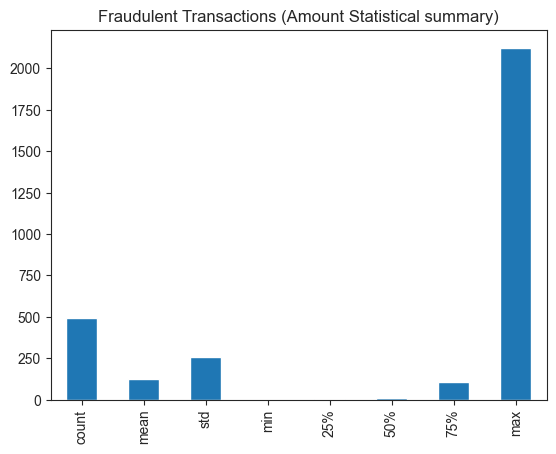

In [10]:
fraudulent_transactions['Amount'].describe().plot(kind='bar');
plt.title('Fraudulent Transactions (Amount Statistical summary)');

Text(0.5, 1.0, 'Normal Transactions (Amount Statistical summary)')

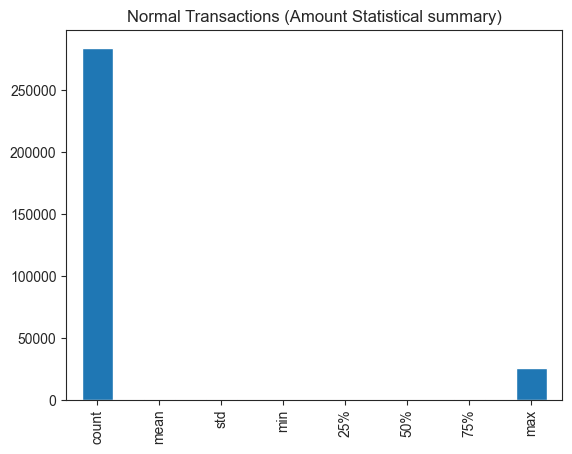

In [11]:
normal_transactions['Amount'].describe().plot(kind='bar')
plt.title('Normal Transactions (Amount Statistical summary)')

Text(0.5, 1.0, 'fraudulent transactions')

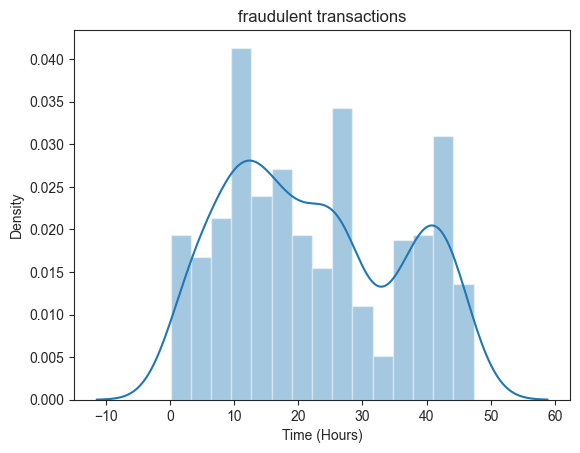

In [70]:
# Time elapsed for fraudulent vs normal transaction
sns.distplot(fraudulent_transactions['Time']/60/60, bins=15)
plt.xlabel('Time (Hours)')
plt.title('fraudulent transactions')

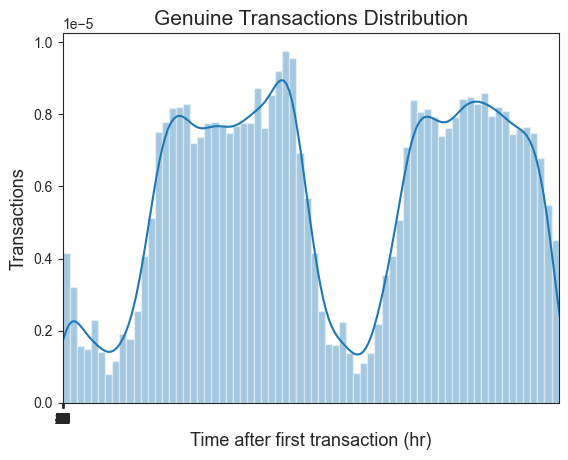

In [71]:
sns.distplot(normal_transactions[ 'Time'], 70)
plt.xlabel('Time after first transaction (hr)',fontsize=13)
plt.xticks(np.arange(0,100, 3))
plt.ylabel('Transactions',fontsize=13)
plt.xlim([normal_transactions['Time'].min(), normal_transactions['Time'].max()]);

### Down sample the data so we have a balanced dataset

In [22]:

normal_transactions = normal_transactions.sample(n=508)
new_df = pd.concat([normal_transactions, fraudulent_transactions], axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1737,1347.0,-1.162167,1.330636,0.857535,-0.972183,0.119593,-0.476537,0.665480,0.089979,0.784365,0.289094,-1.583078,-0.692858,-1.037677,-0.162630,-0.077994,0.222934,-0.563662,-0.230345,0.009681,0.359539,-0.350400,-0.682780,-0.137831,-0.465217,0.015507,0.361908,0.610382,0.353210,5.00,0
10872,18628.0,1.185528,-0.344056,1.005394,-0.559171,-0.990412,-0.312276,-0.752185,0.041631,3.153685,-1.489432,0.671747,-1.863920,1.235190,1.385480,0.825904,-0.746612,0.885957,0.056749,-0.006790,-0.200830,-0.132610,0.108446,0.000222,0.028140,0.388548,-0.695484,0.079089,0.026619,11.85,0
259516,159149.0,1.802861,-0.905121,-2.586890,-0.783619,2.114923,3.502515,-0.469054,0.813151,0.928708,-0.246151,-0.186256,0.585898,-0.265458,0.325612,0.152673,-0.569273,-0.181026,-0.750980,0.192335,0.071052,-0.097600,-0.405025,0.152254,0.721255,-0.071332,-0.080277,-0.027465,-0.042088,121.86,0
94093,64728.0,-0.473046,0.875376,2.034291,0.831505,-0.198796,-0.368773,0.488464,0.124950,-0.816553,-0.192908,1.409007,0.390519,-0.632274,0.528866,0.627499,0.105059,-0.347114,0.391424,0.770313,0.056372,-0.166995,-0.640588,-0.025316,0.472764,0.121216,-0.584141,0.005107,-0.008147,23.33,0
187728,127663.0,-2.582950,-0.299558,-0.363776,4.628543,1.861277,1.734683,0.114008,0.736959,-2.039360,1.953996,0.573087,-0.228210,-0.492798,0.917473,0.642508,-0.950459,0.901976,-0.479271,0.578105,-0.630007,0.332540,1.886254,0.489458,-1.430084,-0.017389,0.901550,0.186196,0.236751,89.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


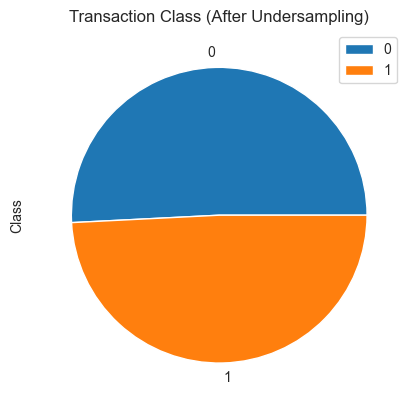

In [18]:
new_df.groupby('Class')['Class'].count().plot(kind='pie')
plt.title('Transaction Class (After Undersampling)')
plt.legend();

In [19]:
fraudulent_transactions = new_df[new_df['Class'] == 1]
normal_transactions = new_df[new_df['Class'] == 0]

Text(0.5, 1.0, 'Transaction time (A')

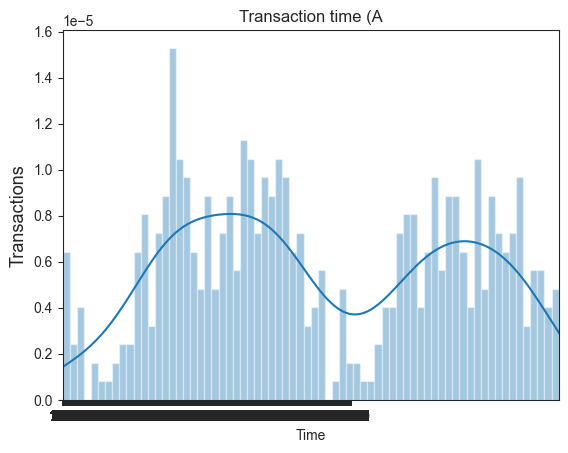

In [27]:
sns.distplot(normal_transactions['Time'], 70)
plt.xticks(np.arange(0,100000, 3))
plt.ylabel('Transactions',fontsize=13)
plt.xlim([normal_transactions['Time'].min(), normal_transactions['Time'].max()]);
plt.title('Transaction time (A')

In [ ]:
# Time elapsed for fraudulent vs normal transaction
sns.distplot(fraudulent_transactions['Time']/60/60, bins=15)
plt.xlabel('Time (Hours)')
plt.title('fraudulent transactions')